In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

seed = 1234
np.random.seed(seed)  


file_path = r"db/diabetic_data.csv"
df = pd.read_csv(file_path, sep=",", encoding="utf-8", na_values=["?", "NA"])   #creates dataframe
print(df)


# X, Y = []


        encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)    NaN   
1             149190     55629189        Caucasian  Female  [10-20)    NaN   
2              64410     86047875  AfricanAmerican  Female  [20-30)    NaN   
3             500364     82442376        Caucasian    Male  [30-40)    NaN   
4              16680     42519267        Caucasian    Male  [40-50)    NaN   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)    NaN   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)    NaN   
101763     443854148     41088789        Caucasian    Male  [70-80)    NaN   
101764     443857166     31693671        Caucasian  Female  [80-90)    NaN   
101765     443867222    175429310        Caucasian    Male  [70-80)    NaN   

        admission_type_id  discharge_disposition_id  admission_

/var/folders/0w/y4dpby0x4w5bxhdsw3zwwlfh0000gn/T/ipykernel_60402/3286620348.py:17: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=",", encoding="utf-8", na_values=["?", "NA"])   #creates dataframe


# of instances and features are:  101766 50


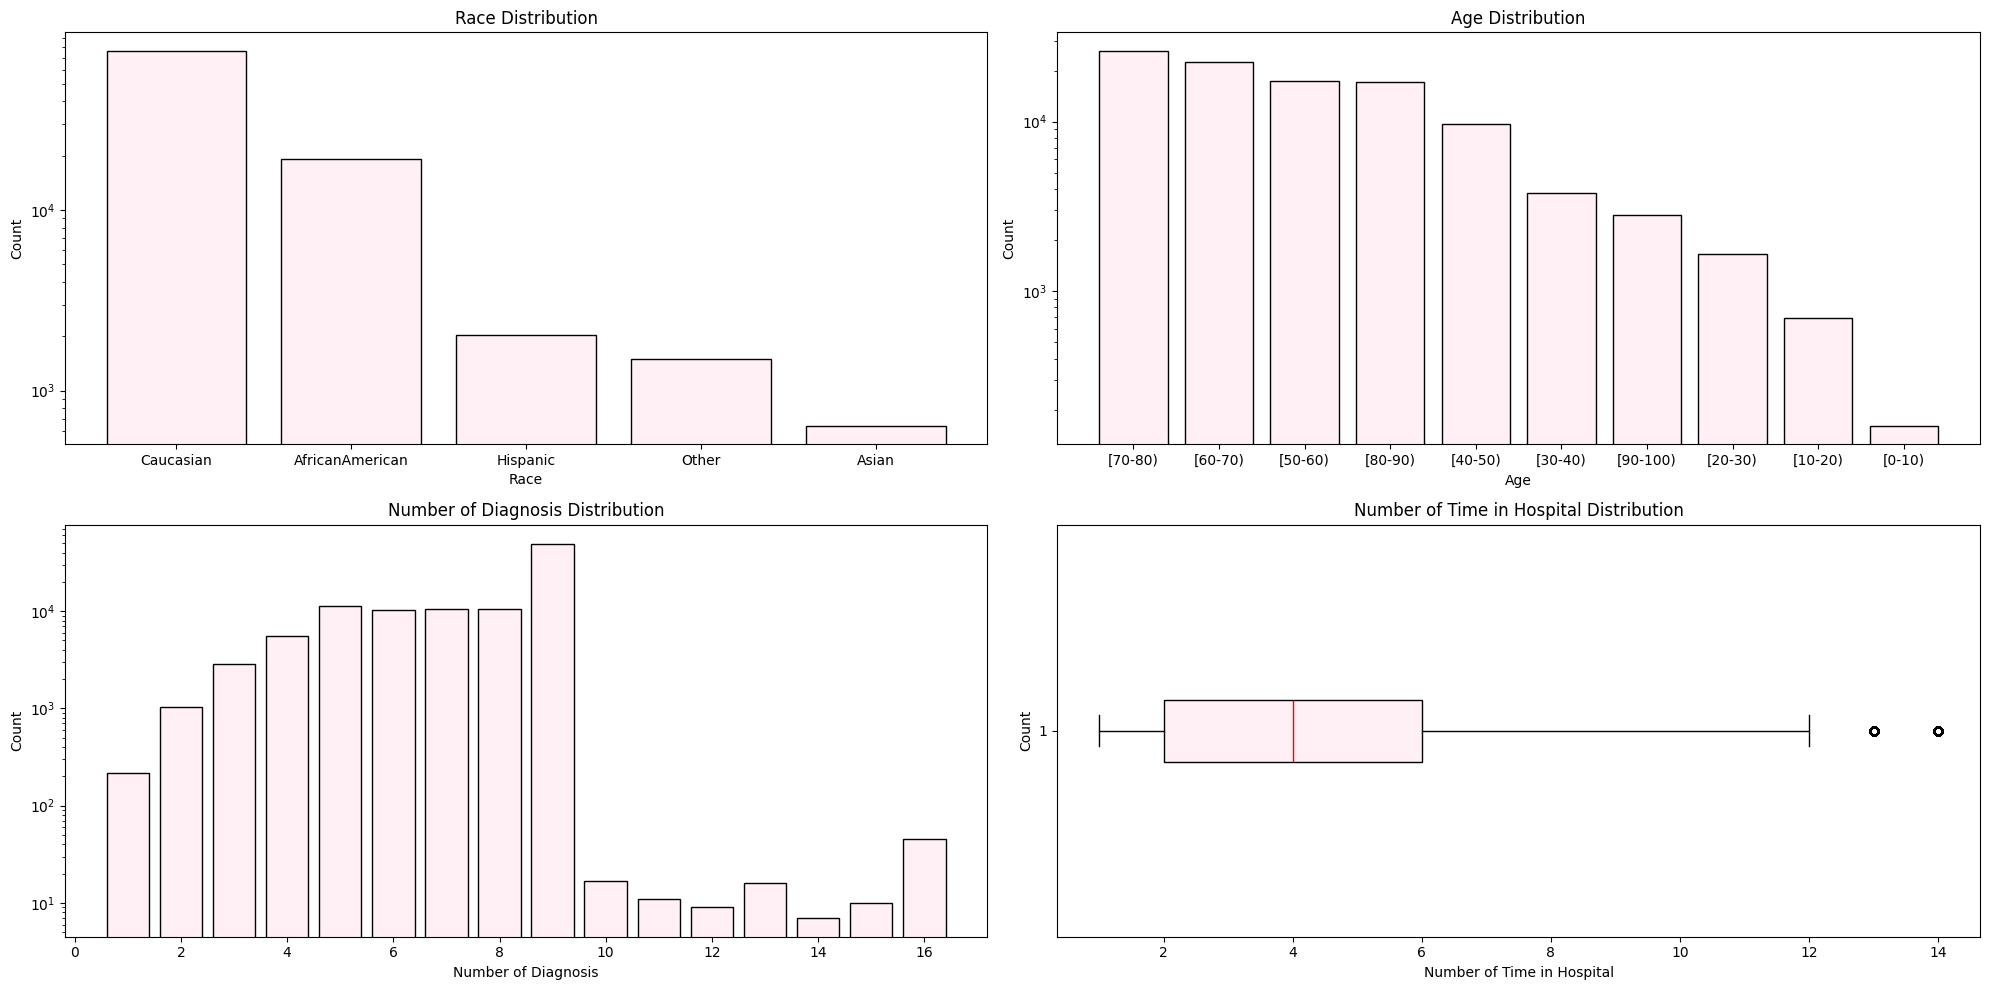

In [261]:
# Statistics
num_instances = df.shape[0]
num_features = df.shape[1]
print("# of instances and features are: ", num_instances, num_features)
# print(df.describe())

fig, axes = plt.subplots(2,2, figsize=(20, 10))

race = df.iloc[:, 2]
race_count = race.value_counts()
race_index = race_count.index.tolist()
race_value = race_count.values.tolist()
axes[0,0].bar(race_index,race_value, color='lavenderblush', edgecolor='black')
axes[0,0].set_title("Race Distribution")
axes[0,0].set_xlabel("Race")
axes[0,0].set_ylabel("Count")
axes[0,0].set_yscale('log')

age = df.iloc[:, 4]
age_count = age.value_counts()
age_index = age_count.index.tolist()
age_value = age_count.values.tolist()
axes[0,1].bar(age_index, age_value, color='lavenderblush', edgecolor='black')
axes[0,1].set_title("Age Distribution")
axes[0,1].set_xlabel("Age")
axes[0,1].set_ylabel("Count")
axes[0,1].set_yscale('log')

num_dignosis = df.iloc[:, 21]
num_dignosis_count = num_dignosis.value_counts()
num_dignosis_index = num_dignosis_count.index.tolist()
num_dignosis_value = num_dignosis_count.values.tolist()
axes[1,0].bar(num_dignosis_index, num_dignosis_value, color='lavenderblush', edgecolor='black')
axes[1,0].set_title("Number of Diagnosis Distribution")
axes[1,0].set_xlabel("Number of Diagnosis")
axes[1,0].set_ylabel("Count")
axes[1,0].set_yscale('log')

time_in_hospital = df.iloc[:, 9]
time_in_hospital_count = time_in_hospital.value_counts()
time_in_hospital_index = time_in_hospital.index.tolist()
time_in_hospital_value = time_in_hospital.values.tolist()
# axes[1,1].hist(time_in_hospital_index, time_in_hospital_value, color='lavenderblush', edgecolor='black')
axes[1,1].boxplot(time_in_hospital, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lavenderblush', color='black'),
            whiskerprops=dict(color='black'), medianprops=dict(color='red'))
axes[1,1].set_title("Number of Time in Hospital Distribution")
axes[1,1].set_xlabel("Number of Time in Hospital")
axes[1,1].set_ylabel("Count")



plt.tight_layout()
plt.show()


The dataset we have chosen is __Diabetes 130-US hospitals__, there are 101766 instances and there are 50 features.

Text(0.5, 1.0, 'Age vs Number of Diagnoses Linear Fit')

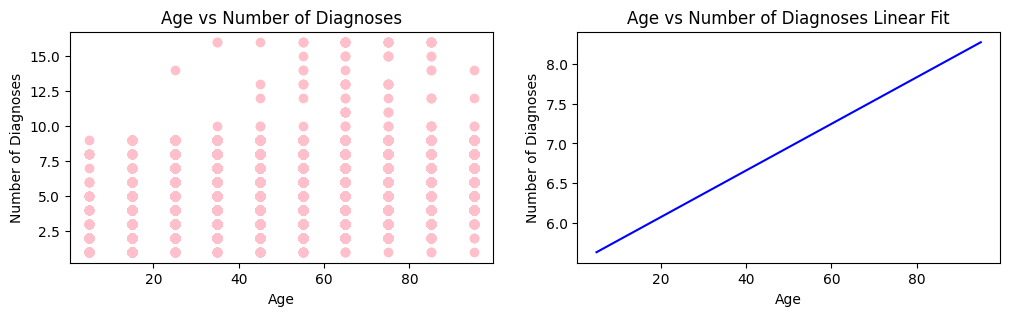

In [262]:
#LinearReg Age

figure,axes = plt.subplots(1,2,figsize=(12,3))

def convert_age_range(age_range):
    lower_str, upper_str = age_range.split("-")
    lower_bound = int(lower_str[1:])
    upper_bound = int(upper_str[:-1])
    return (lower_bound + upper_bound) / 2
#print(df['age'][0])

transformed_age = df['age'].apply(convert_age_range)

X = transformed_age.values.reshape(-1, 1)
y = df['number_diagnoses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions over a range of x values for visualization
x_spaced = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)  # 100 points between min and max age
yhat_spaced = lr.predict(x_spaced)

#plt.figure(figsize=(6, 4))
axes[0].scatter(X, y, color='pink')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of Diagnoses')
axes[0].set_title('Age vs Number of Diagnoses')

axes[1].plot(x_spaced, yhat_spaced, color='blue')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Number of Diagnoses')
axes[1].set_title('Age vs Number of Diagnoses Linear Fit')

#print(f"Coefficients: {lr.coef_}")
#print(f"Intercept: {lr.intercept_}")


[Text(0, 0, 'Caucasian'),
 Text(1, 0, 'African American'),
 Text(2, 0, 'Hispanic'),
 Text(3, 0, 'Asian'),
 Text(4, 0, 'Other')]

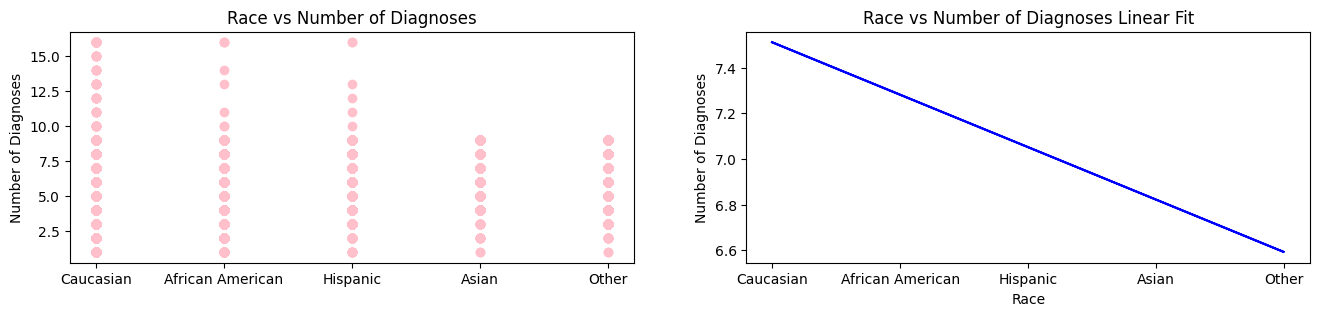

In [263]:
#LinearReg Race
figure,axes = plt.subplots(1,2,figsize=(16,3))

codes = {"Caucasian" : 0, "AfricanAmerican" : 1, "Hispanic" : 2, "Asian" : 3, "Other" : 4}

# no missing values in 'x_mapped'
df_cleaned_race = df.dropna(subset=['race'])

# Map race to numerical values
x_mapped_cleaned = df_cleaned_race['race'].replace(codes)

X = x_mapped_cleaned.values.reshape(-1, 1)  # Reshaping into (n_samples, n_features)
y = df_cleaned_race['number_diagnoses']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr2 = LinearRegression()
lr2.fit(X_train, y_train)

#print(f"Coefficients: {lr2.coef_}")
#print(f"Intercept: {lr2.intercept_}")

yhat = lr2.predict(X_test)

axes[0].scatter(X, y, color='pink')
axes[1].set_xlabel('Race')
axes[0].set_ylabel('Number of Diagnoses')
axes[0].set_title('Race vs Number of Diagnoses')

axes[1].plot(X_test, yhat, color='blue')
axes[1].set_xlabel('Race')
axes[1].set_ylabel('Number of Diagnoses')
axes[1].set_title('Race vs Number of Diagnoses Linear Fit')

x_ticks_codes = {"Caucasian" : 0, "African American" : 1, "Hispanic" : 2, "Asian" : 3, "Other" : 4}
race_labels = list(x_ticks_codes.keys())  # ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other']

axes[0].set_xticks(np.arange(len(race_labels)))  # set x-ticks positions to match the number of races
axes[0].set_xticklabels(race_labels)

axes[1].set_xticks(np.arange(len(race_labels)))
axes[1].set_xticklabels(race_labels)

/Users/nathaliechiu/Desktop/cs178_w25/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Times in Hospital vs Number of Diagnoses Linear Fit')

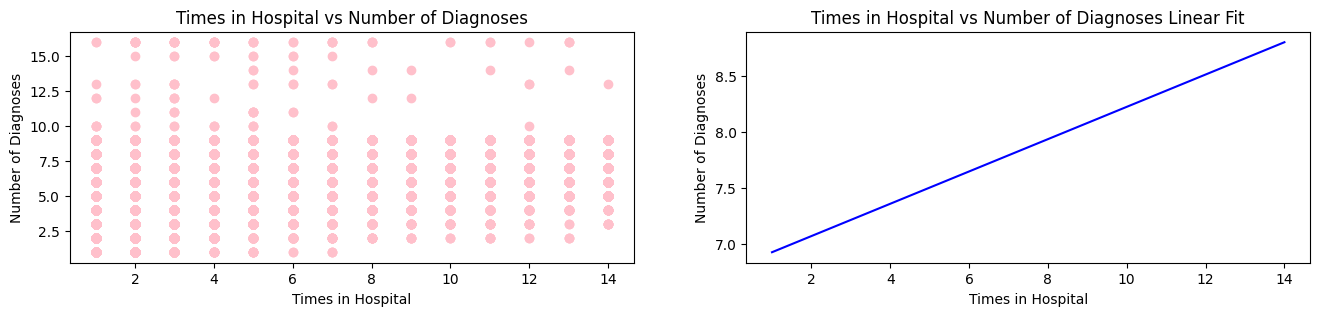

In [264]:
#LinearReg Times in Hospital
figure,axes = plt.subplots(1,2,figsize=(16,3))

df_cleaned_time = df.dropna(subset=['time_in_hospital'])


X = df_cleaned_time[['time_in_hospital']]
y = df_cleaned_time['number_diagnoses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

# make predictions for line
x_spaced = np.linspace(X['time_in_hospital'].min(), X['time_in_hospital'].max(), 100).reshape(-1, 1)  # 100 points between min and max age
yhat_spaced = lr.predict(x_spaced)


axes[0].scatter(X, y, color='pink')
axes[0].set_xlabel('Times in Hospital')
axes[0].set_ylabel('Number of Diagnoses')
axes[0].set_title('Times in Hospital vs Number of Diagnoses')

axes[1].plot(x_spaced, yhat_spaced, color='blue')
axes[1].set_xlabel('Times in Hospital')
axes[1].set_ylabel('Number of Diagnoses')
axes[1].set_title('Times in Hospital vs Number of Diagnoses Linear Fit')

In [256]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Define encoding mappings for categorical variables of race, gender and age
codes_race = {"Caucasian": 0, "AfricanAmerican": 1, "Hispanic": 2, "Asian": 3, "Other": 4, 'Unknown/Invalid': 4}
codes_gender = {"Male": 0, "Female": 1, 'Unknown/Invalid': 2}
codes_age = {"[0-10)": 0, "[10-20)": 1, "[20-30)": 2, "[30-40)": 3, "[40-50)": 4,
             "[50-60)": 5, "[60-70)": 6, "[70-80)": 7, "[80-90)": 8, "[90-100)": 9, 'Unknown/Invalid': 10}




# Select features and target
X = df[["race", "gender", "age"]]
y = df["number_diagnoses"]

# Encode categorical features using the aforementioned mappings
X["race"] = X["race"].replace(codes_race).dropna()
X["gender"] = X["gender"].replace(codes_gender).dropna()
X["age"] = X["age"].replace(codes_age).dropna()

# Split the dataset randomly: perhaps 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter values to tune - using max depth, min sample split, 
# and min samples leaf parameters and a range of values.
max_depth_values = [1, 5, 10, 20, 30, 50, 100]
min_samples_split_values = [2, 10, 20, 50]
min_samples_leaf_values = [1, 5, 10, 20, 50]

best_model = None               # best model 
best_val_error = float("inf")   # best validation error
best_params = None              # best parameters

# Grid search over hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
          
            # create model
            learner = DecisionTreeClassifier(
                criterion="entropy",
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )
            learner.fit(X_train, y_train)  # fit model

            # predict 
            y_train_pred = learner.predict(X_train)
            y_val_pred = learner.predict(X_val)

            # get errors
            train_error = 1 - accuracy_score(y_train, y_train_pred)
            val_error = 1 - accuracy_score(y_val, y_val_pred)

            # Track best model
            if val_error < best_val_error:
                best_val_error = val_error
                best_model = learner
                best_params = (max_depth, min_samples_split, min_samples_leaf)

# Print best parameters and errors
print()
print(f"Best Parameters: max_depth={best_params[0]}, min_samples_split={best_params[1]}, min_samples_leaf={best_params[2]}")
print(f"Training Error: {train_error:.4f}, Validation Error: {val_error:.4f}")




# Set figure size for better viewability
fig, axe = plt.subplots(figsize=(200,100))

# Plot the decision tree
plot_tree(
    best_model,
    ax=axe,
    fontsize=15, 
    feature_names=["race", "gender", "age"],  # Feature labels
    class_names=[str(cls) for cls in sorted(y.unique())],  # Target class labels
    filled=True,  # Color nodes by class
    rounded=True  # Rounded box edges for better visualization
)

plt.show()

/var/folders/0w/y4dpby0x4w5bxhdsw3zwwlfh0000gn/T/ipykernel_60402/2309135728.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["race"] = X["race"].replace(codes_race).dropna()
/var/folders/0w/y4dpby0x4w5bxhdsw3zwwlfh0000gn/T/ipykernel_60402/2309135728.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["gender"] = X["gender"].replace(codes_gender).dropna()
/var/folders/0w/y4dpby0x4w5bxhdsw3zwwlfh0000gn/T/ipykernel_60402/2309135728.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy 


Best Parameters: max_depth=10, min_samples_split=2, min_samples_leaf=50
Training Error: 0.5118, Validation Error: 0.5116


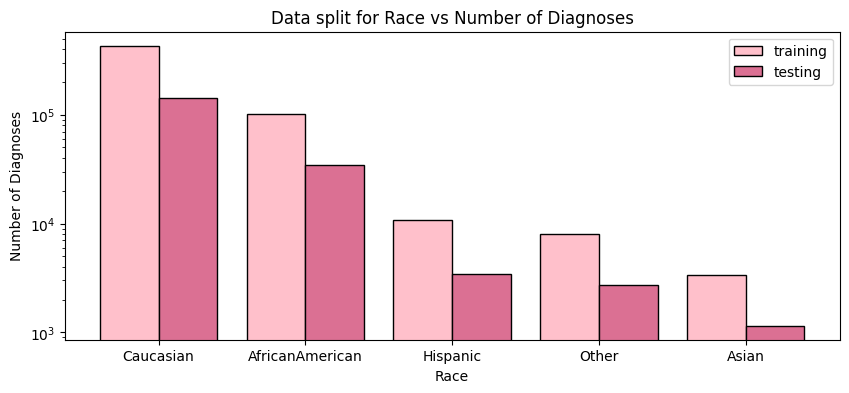

In [281]:
#KNN: race

# imports
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# identify X and Y, split training and testing sets
df_cleaned_race = df.dropna(subset=['race'])

# race of each instances
X = df_cleaned_race[['race']]
codes = {'Caucasian':0, 'AfricanAmerican':1, 'Hispanic':2, 'Other':3, 'Asian':4}
X = X.replace(codes).astype(int)
Y = df_cleaned_race[['number_diagnoses']]

Xt, Xe, Yt, Ye = train_test_split(X, Y, test_size=0.25, random_state=seed)
# print(Xt.shape)
# print(Yt.shape)
# print(Xe.shape)
# visualize data splits for race and number of diagnosis
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
width = 0.4  

tr_counts = Xt.join(Yt).groupby('race').sum()
te_counts = Xe.join(Ye).groupby('race').sum()
ax.bar(tr_counts.index - width/2, tr_counts['number_diagnoses'], width=width, color='pink', edgecolor='black', label='training')
ax.bar(te_counts.index + width/2, te_counts['number_diagnoses'], width=width, color='palevioletred', edgecolor='black', label='testing')

ax.set_xticks(list(codes.values()))
ax.set_xticklabels(list(codes.keys()))
ax.set_title('Data split for Race vs Number of Diagnoses')
ax.set_xlabel('Race')
ax.set_ylabel('Number of Diagnoses')
ax.set_yscale('log')

plt.legend()
plt.show()


Text(0, 0.5, 'Accuracy Score')

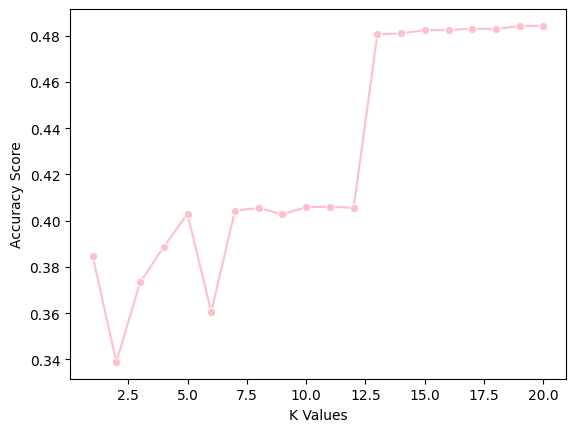

In [258]:
scaler = StandardScaler()
Xt = scaler.fit_transform(Xt)
Xe = scaler.transform(Xe)
Yt = np.array(Yt).ravel()
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(Xt, Yt)
# y_pred = knn.predict(Xt)
# accuracy = accuracy_score(Yt, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

k_values = [i for i in range (1,21)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, Xt, Yt, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o', color='pink')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [269]:
# Race vs Num Diagnosis
print(f"Accuracy score of k=1: {scores[0]}")
print(f"Accuracy score of k=10: {scores[9]}")
print(f"Accuracy score of k=20: {scores[19]}")

Accuracy score of k=1: 0.384930015893433
Accuracy score of k=10: 0.4059163915371308
Accuracy score of k=20: 0.48421981969697636


/Users/nathaliechiu/Desktop/cs178_w25/.venv/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nathaliechiu/Desktop/cs178_w25/.venv/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/nathaliechiu/Desktop/cs178_w25/.venv/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


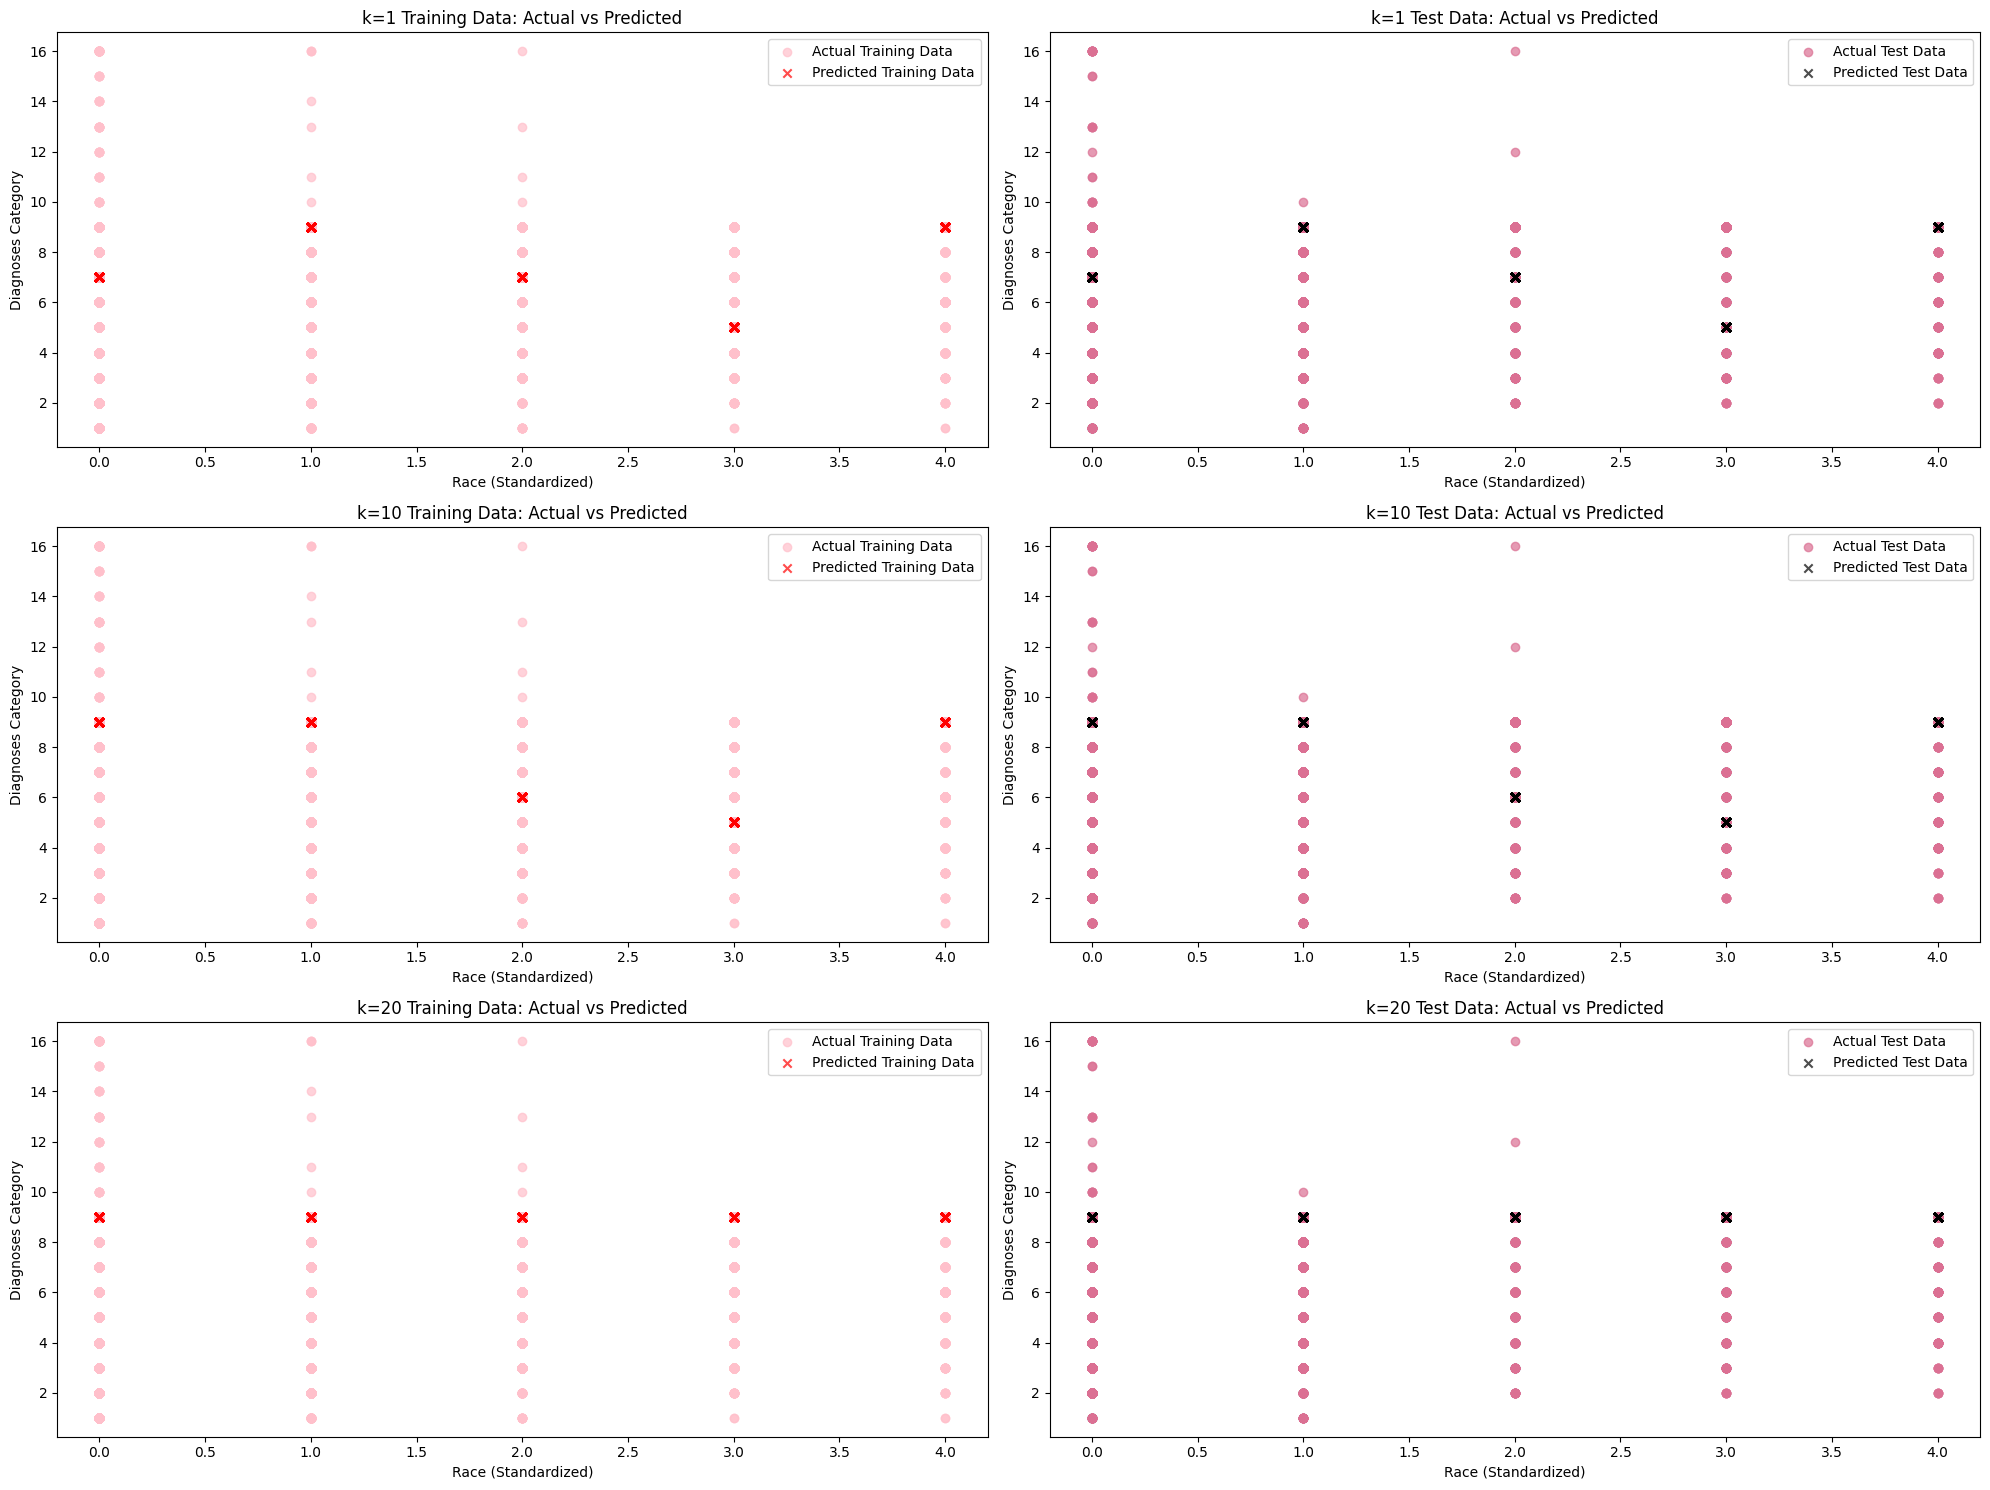

In [284]:
scaler = StandardScaler()
Xt_scaled = scaler.fit_transform(Xt)
Xe_scaled = scaler.transform(Xe)

k_val = [1,10,20]
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

for index, k in enumerate(k_val):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xt, Yt)

    Y_train_pred = knn.predict(Xt)
    Y_test_pred = knn.predict(Xe)    

    ax[index,0].scatter(Xt, Yt, color='pink', label='Actual Training Data', alpha=0.7)
    ax[index,0].scatter(Xt, Y_train_pred, color='red', marker='x', label='Predicted Training Data', alpha=0.7)
    ax[index,0].set_xlabel("Race (Standardized)")
    ax[index,0].set_ylabel("Diagnoses Category")
    ax[index,0].set_title(f"k={k} Training Data: Actual vs Predicted")
    ax[index,0].legend()

    ax[index,1].scatter(Xe, Ye, color='palevioletred', label='Actual Test Data', alpha=0.7)
    ax[index,1].scatter(Xe, Y_test_pred, color='black', marker='x', label='Predicted Test Data', alpha=0.7)
    ax[index,1].set_xlabel("Race (Standardized)")
    ax[index,1].set_ylabel("Diagnoses Category")
    ax[index,1].set_title(f"k={k} Test Data: Actual vs Predicted")
    ax[index,1].legend()

plt.tight_layout()
plt.show()

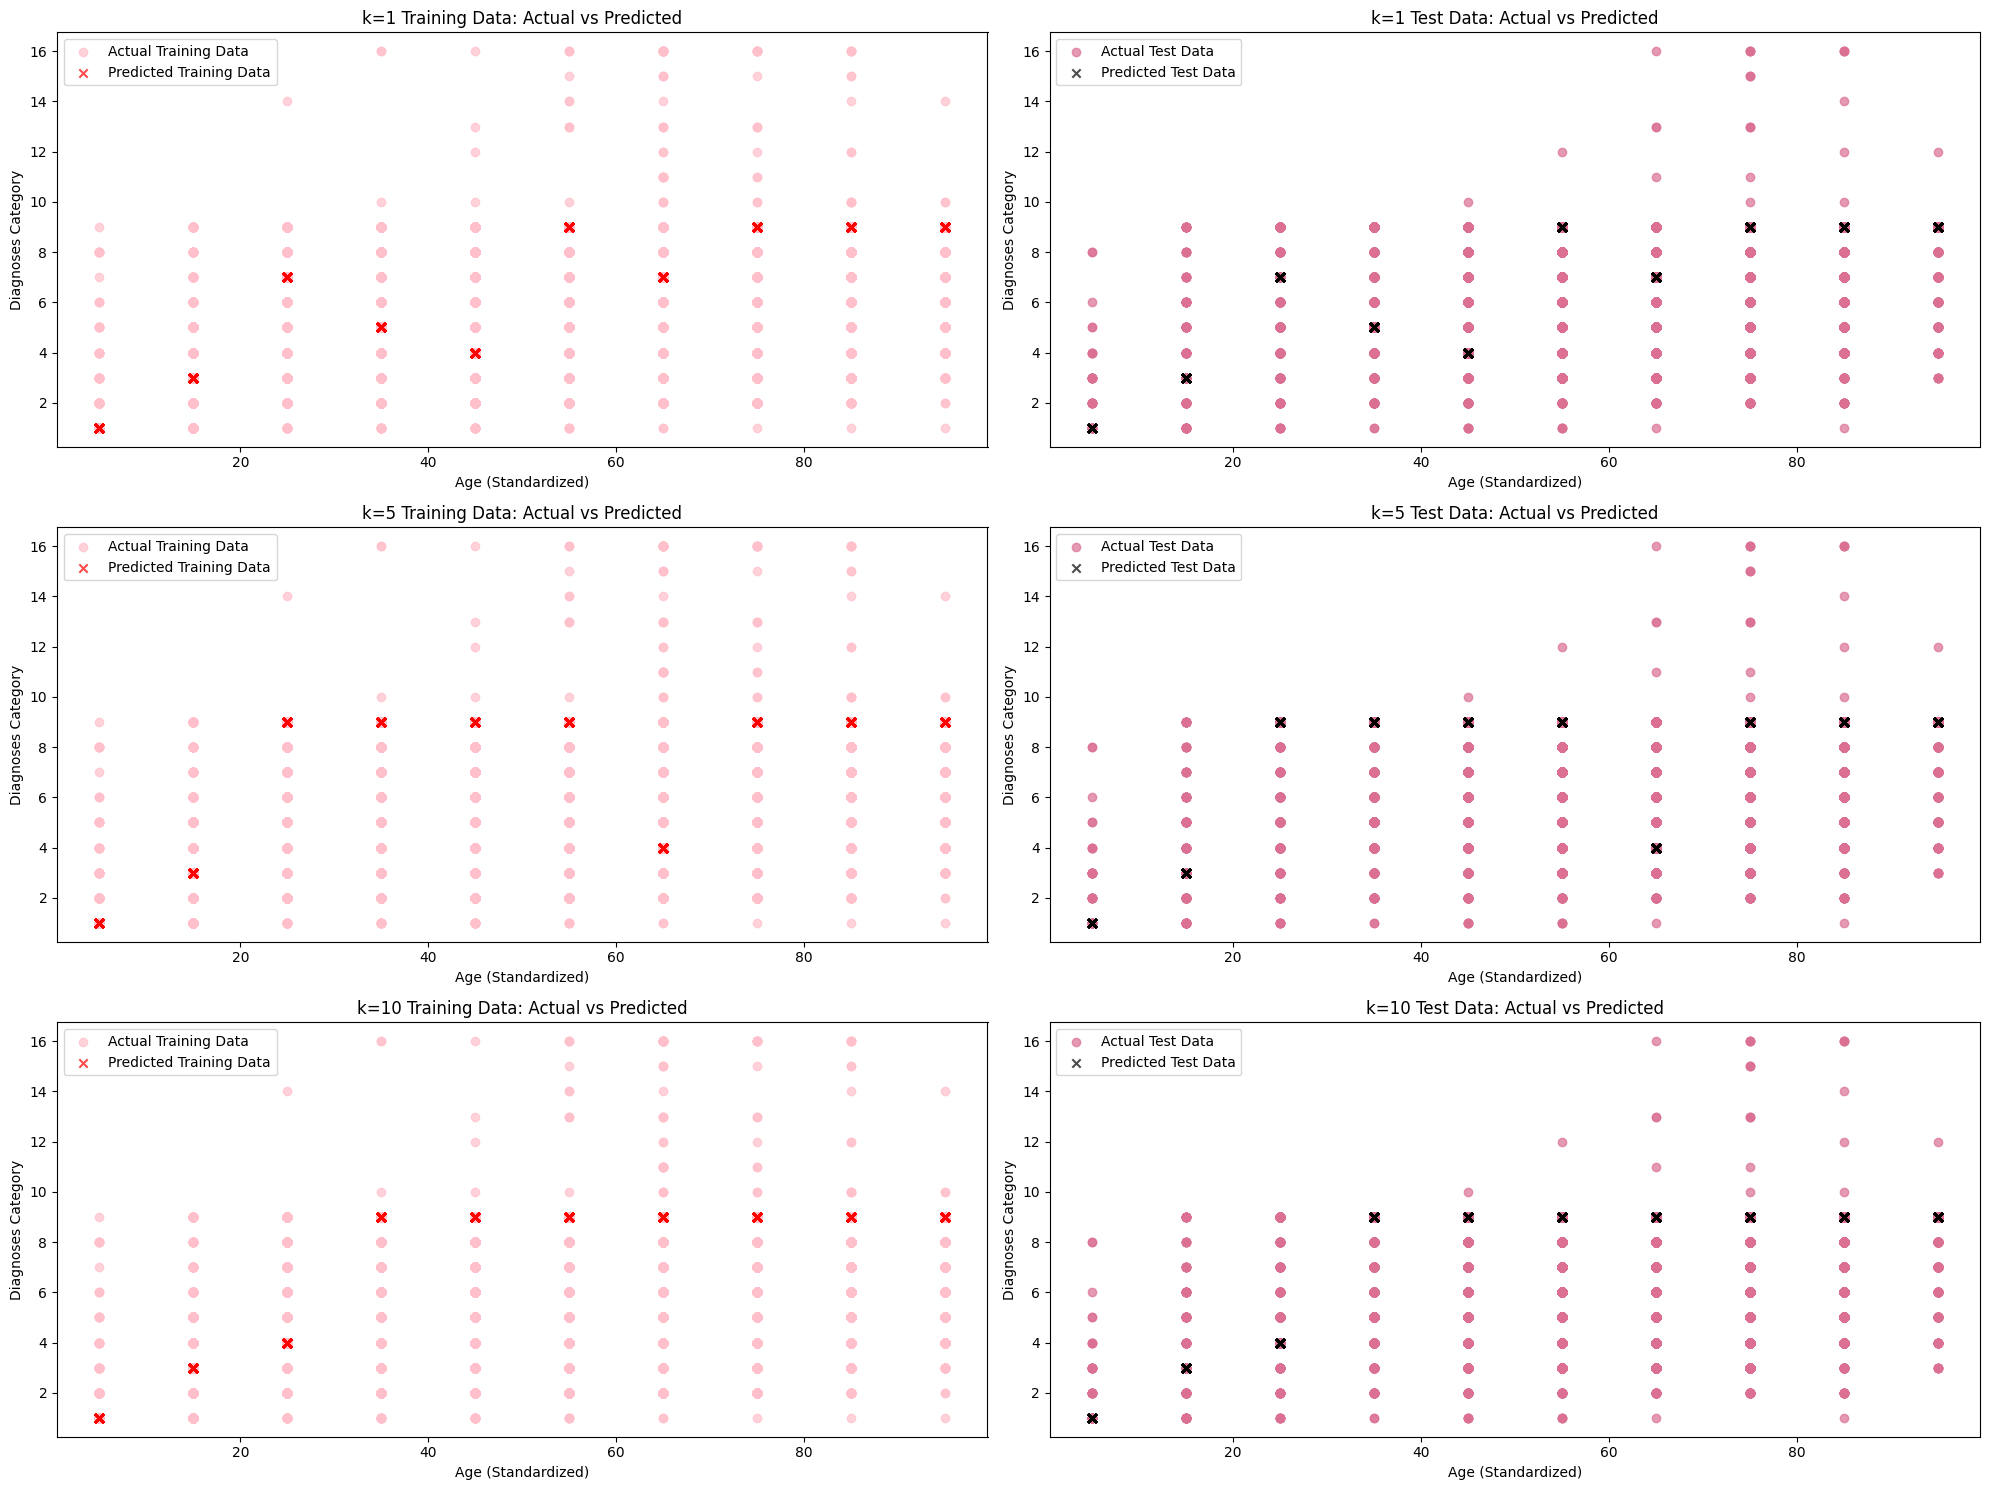

In [300]:
# Age
def convert_age_range(age_range):
    lower_str, upper_str = age_range.split("-")
    lower_bound = int(lower_str[1:])
    upper_bound = int(upper_str[:-1])
    return (lower_bound + upper_bound) / 2
#print(df['age'][0])

transformed_age = df['age'].apply(convert_age_range)

X = transformed_age.values.reshape(-1, 1)
y = df['number_diagnoses']

Xt, Xe, Yt, Ye = train_test_split(X, y, test_size=0.25, random_state=seed)
# print(Xt)
scaler = StandardScaler()
# Xt_scaled = scaler.fit_transform(Xt)
# Xe_scaled = scaler.transform(Xe)
Yt = np.array(Yt).ravel()

k_val = [1,5,10]
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

for index, k in enumerate(k_val):
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(Xt, Yt)

    Y_train_pred = knn1.predict(Xt)
    Y_test_pred = knn1.predict(Xe)    

    ax[index,0].scatter(Xt, Yt, color='pink', label='Actual Training Data', alpha=0.7)
    ax[index,0].scatter(Xt, Y_train_pred, color='red', marker='x', label='Predicted Training Data', alpha=0.7)
    ax[index,0].set_xlabel("Age (Standardized)")
    ax[index,0].set_ylabel("Diagnoses Category")
    ax[index,0].set_title(f"k={k} Training Data: Actual vs Predicted")
    ax[index,0].legend()

    ax[index,1].scatter(Xe, Ye, color='palevioletred', label='Actual Test Data', alpha=0.7)
    ax[index,1].scatter(Xe, Y_test_pred, color='black', marker='x', label='Predicted Test Data', alpha=0.7)
    ax[index,1].set_xlabel("Age (Standardized)")
    ax[index,1].set_ylabel("Diagnoses Category")
    ax[index,1].set_title(f"k={k} Test Data: Actual vs Predicted")
    ax[index,1].legend()

plt.tight_layout()
plt.show()

[np.float64(0.2635226966842251), np.float64(0.37152165859473546), np.float64(0.409308611284498)]
Accuracy score of k=1: 0.2635226966842251
Accuracy score of k=10: 0.37152165859473546
Accuracy score of k=20: 0.409308611284498


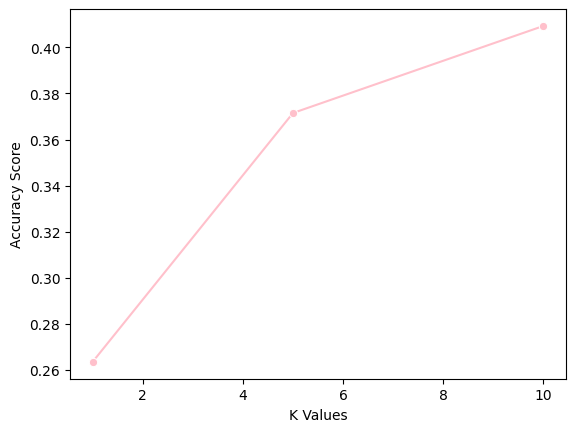

In [301]:
scores = []
k_values = [1,5,10]
for k in k_values:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn1, Xt, Yt, cv=5)
    scores.append(np.mean(score))

print(scores)
sns.lineplot(x = k_values, y = scores, marker = 'o', color='pink')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
print(f"Accuracy score of k=1: {scores[0]}")
print(f"Accuracy score of k=10: {scores[1]}")
print(f"Accuracy score of k=20: {scores[2]}")

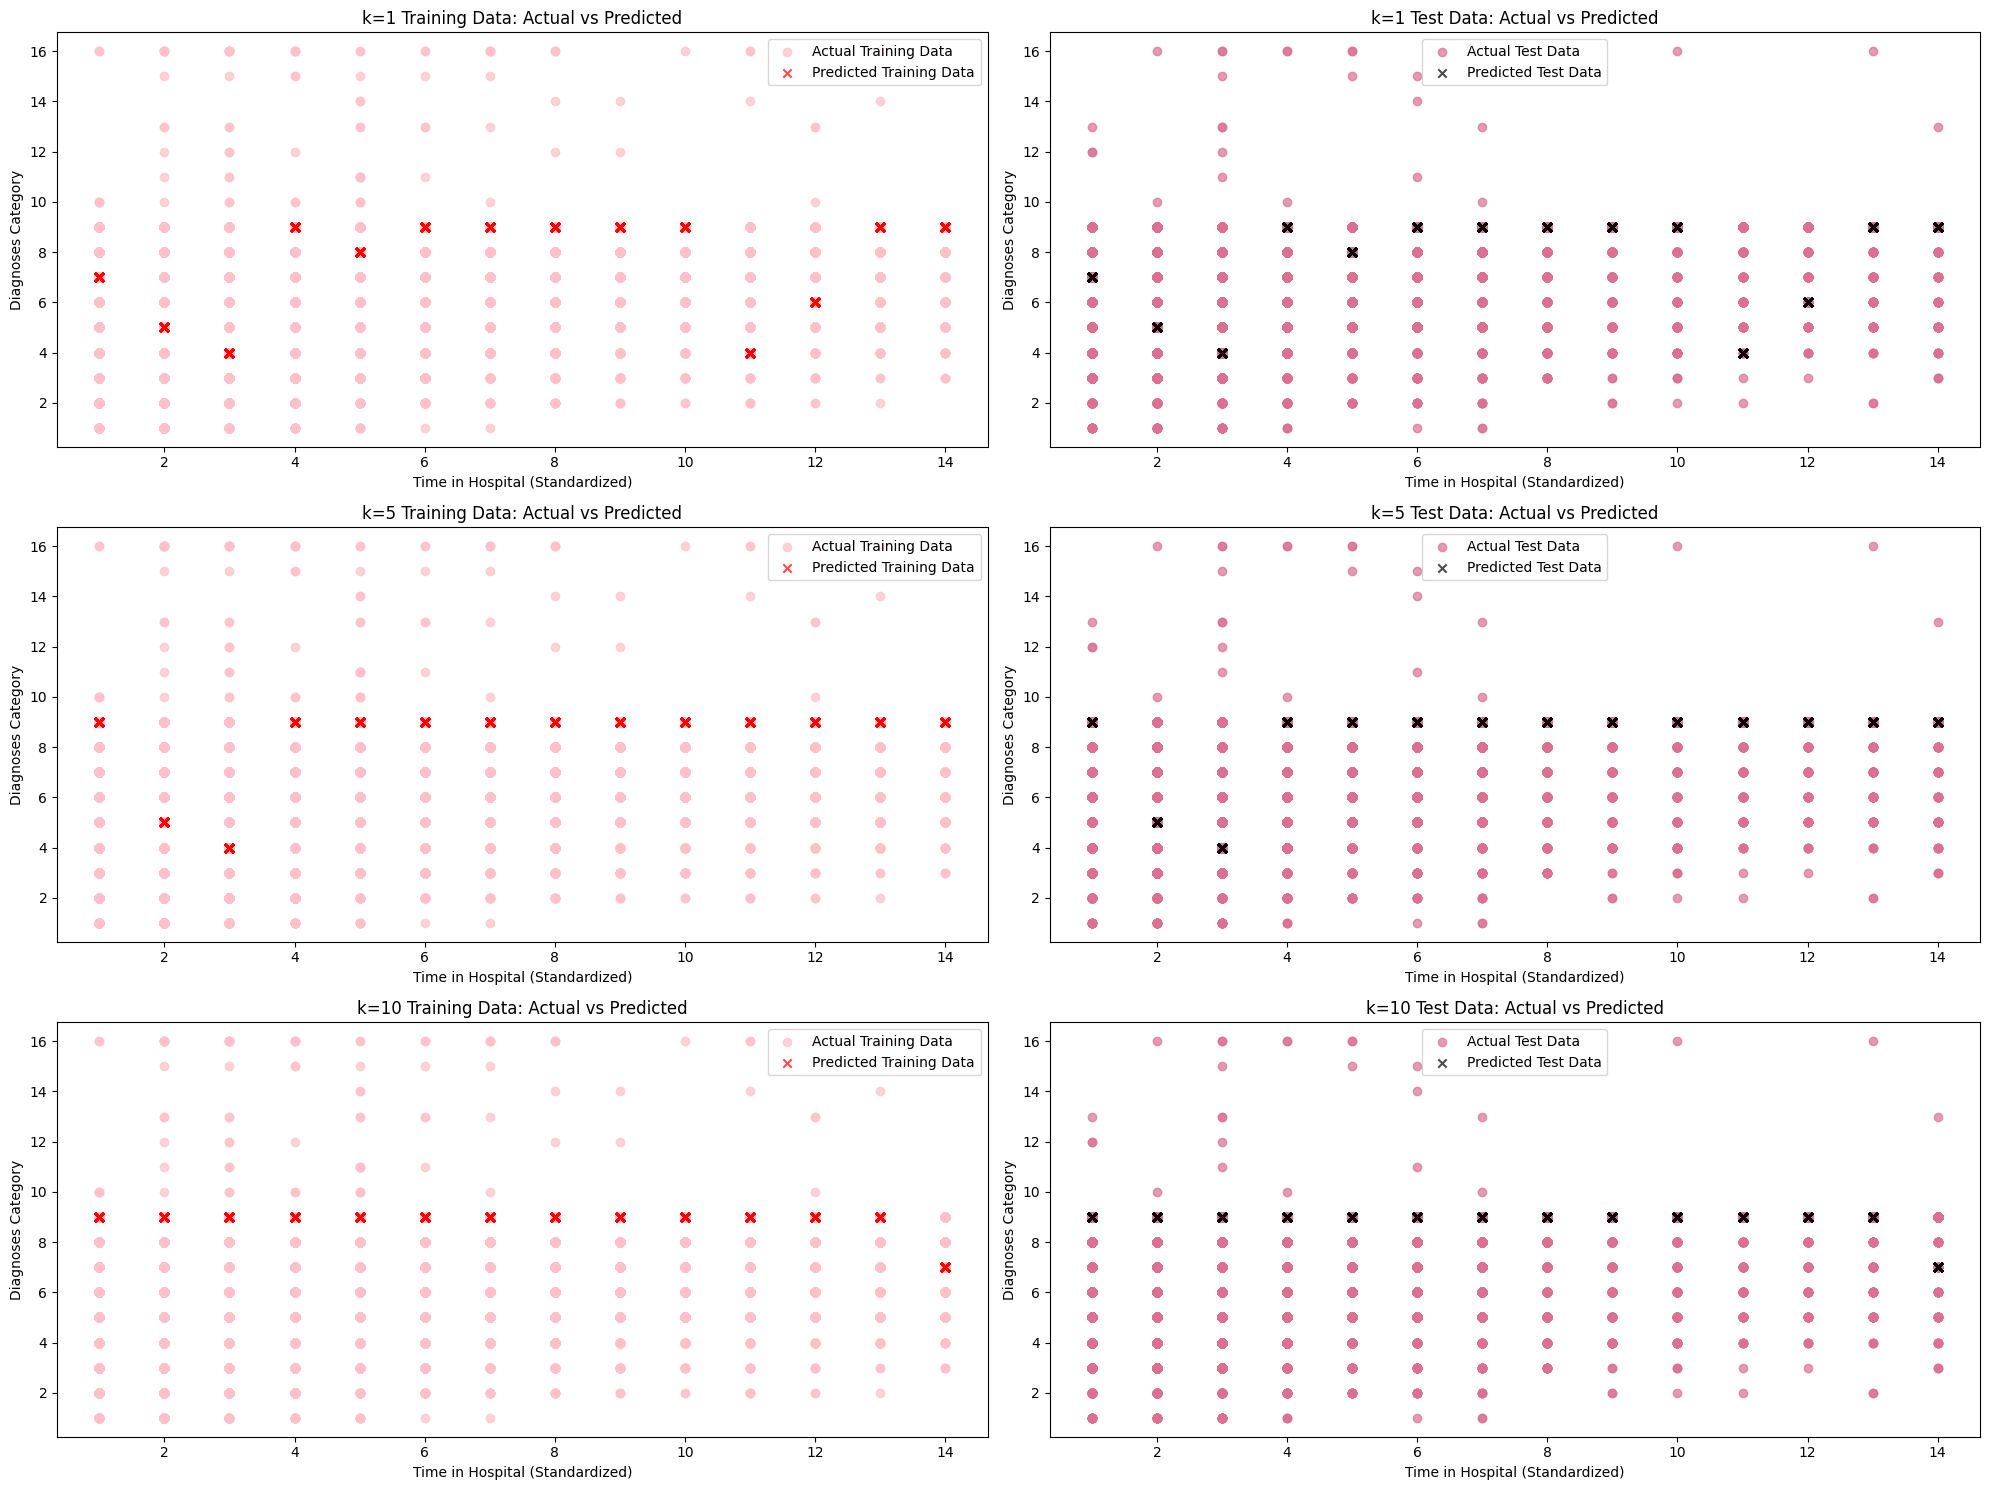

In [302]:
# Time in Hospital
df_cleaned_time = df.dropna(subset=['time_in_hospital'])

X = df_cleaned_time[['time_in_hospital']]
y = df_cleaned_time['number_diagnoses']

Xt, Xe, Yt, Ye = train_test_split(X, y, test_size=0.25, random_state=seed)
# print(Xt)
Yt = np.array(Yt).ravel()

k_val = [1,5,10]
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

for index, k in enumerate(k_val):
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(Xt, Yt)

    Y_train_pred = knn2.predict(Xt)
    Y_test_pred = knn2.predict(Xe)    

    ax[index,0].scatter(Xt, Yt, color='pink', label='Actual Training Data', alpha=0.7)
    ax[index,0].scatter(Xt, Y_train_pred, color='red', marker='x', label='Predicted Training Data', alpha=0.7)
    ax[index,0].set_xlabel("Time in Hospital (Standardized)")
    ax[index,0].set_ylabel("Diagnoses Category")
    ax[index,0].set_title(f"k={k} Training Data: Actual vs Predicted")
    ax[index,0].legend()

    ax[index,1].scatter(Xe, Ye, color='palevioletred', label='Actual Test Data', alpha=0.7)
    ax[index,1].scatter(Xe, Y_test_pred, color='black', marker='x', label='Predicted Test Data', alpha=0.7)
    ax[index,1].set_xlabel("Time in Hospital (Standardized)")
    ax[index,1].set_ylabel("Diagnoses Category")
    ax[index,1].set_title(f"k={k} Test Data: Actual vs Predicted")
    ax[index,1].legend()

plt.tight_layout()
plt.show()

[np.float64(0.2871057955161126), np.float64(0.3451479547903186), np.float64(0.4249522636771337)]
Accuracy score of k=1: 0.2871057955161126
Accuracy score of k=10: 0.3451479547903186
Accuracy score of k=20: 0.4249522636771337


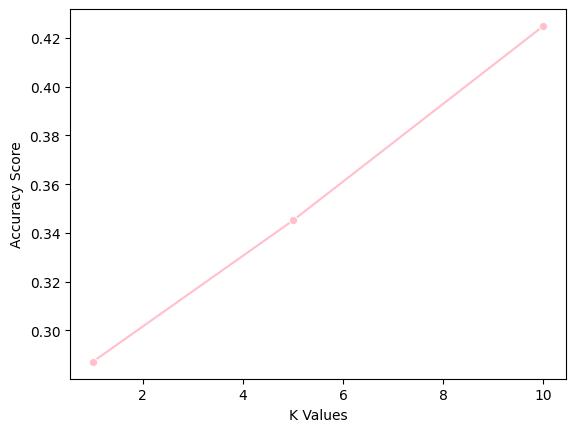

In [303]:
scores = []
k_values = [1,5,10]
for k in k_values:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn1, Xt, Yt, cv=5)
    scores.append(np.mean(score))

print(scores)
sns.lineplot(x = k_values, y = scores, marker = 'o', color='pink')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
print(f"Accuracy score of k=1: {scores[0]}")
print(f"Accuracy score of k=10: {scores[1]}")
print(f"Accuracy score of k=20: {scores[2]}")